In [1]:
# Importing warning libraries
import warnings
warnings.filterwarnings('ignore')

# importing neccesary math libraries
import math

In [2]:
# importing neccessary libraries for data reading and understanding
import numpy as np
import pandas as pd

# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# importing neccessary libraries for modelling
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Data Inspection

In [4]:
# reading the data
lead_dataframe = pd.read_csv('Leads.csv')

In [5]:
# analyzing the dataframe
lead_dataframe.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# analyzing the shape of the dataframe
lead_dataframe.shape

(9240, 37)

In [7]:
# analyzing the info of the dataframe
lead_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# analyzing the values matrix of the dataframe
lead_dataframe.values

array([['7927b2df-8bba-4d29-b9a2-b6e0beafe620', 660737, 'API', ..., 'No',
        'No', 'Modified'],
       ['2a272436-5132-4136-86fa-dcc88c88f482', 660728, 'API', ..., 'No',
        'No', 'Email Opened'],
       ['8cc8c611-a219-4f35-ad23-fdfd2656bd8a', 660727,
        'Landing Page Submission', ..., 'No', 'Yes', 'Email Opened'],
       ...,
       ['aac550fe-a586-452d-8d3c-f1b62c94e02c', 579545,
        'Landing Page Submission', ..., 'No', 'Yes', 'SMS Sent'],
       ['5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9', 579538,
        'Landing Page Submission', ..., 'No', 'No', 'SMS Sent'],
       ['571b5c8e-a5b2-4d57-8574-f2ffb06fdeff', 579533,
        'Landing Page Submission', ..., 'No', 'Yes', 'Modified']],
      dtype=object)

In [9]:
# analyzing the columns of the dataframe
lead_dataframe.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
# analyzing the describe of the dataframe on the numerical columns present in the dataframe
lead_dataframe.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- From the above describe of the variables only TotalVists, Total Time Spent on Website, Page Views Per Visit, Asymmetrique Activity Score, Asymmetrique Profile Score are valid numerical summary statistics of the numerical variables. Lead Number is an unique number given to every lead candidate upon which analyzing the summary statistics is not meaningful.

In [11]:
# analyzing the data types only of the columns
lead_dataframe.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

## Data Modifications

- As per the data there are few columns which are mentioned by the sales team upon contacting the lead. But such variables are not needed for modelling as we build model to identify the potential hot leads from the available data. Then the sales team can contact only these potential lead rather than contacting evreyone. Hence we will drop the columns which are assigned by the sales team to a lead.

- Such columns are: 'Tags', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index',
  'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'

In [12]:
# analyzing the dataframe again
lead_dataframe.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
# Dropping the above mentioned columns from the dataframe
lead_dataframe.drop('Tags', axis = 1, inplace = True)
lead_dataframe.drop('Lead Quality', axis = 1, inplace = True)
lead_dataframe.drop('Lead Profile', axis = 1, inplace = True)
lead_dataframe.drop('Asymmetrique Activity Index', axis = 1, inplace = True)
lead_dataframe.drop('Asymmetrique Profile Index', axis = 1, inplace = True)
lead_dataframe.drop('Asymmetrique Activity Score', axis = 1, inplace = True)
lead_dataframe.drop('Asymmetrique Profile Score', axis = 1, inplace = True)

In [14]:
# analyzing the dataframe after removal of columns
lead_dataframe.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified


- There exists some values in the columns as 'SELECT' which means the customer hasn't made any choise in selection while filling any of the particular value. These values are equivalent to having missing values in the columns. Let's identify such columns and replace the 'SELECT' with NAN values or with suitable values as per the nature of the column.

#### Checking for the value counts in each of the categorical variables for identifying 'SELECT'

In [15]:
# checking the value counts in Lead Origin
lead_dataframe['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [16]:
# checking the value counts in 'Lead Source'
lead_dataframe['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
welearnblog_Home      0.010865
Pay per Click Ads     0.010865
blog                  0.010865
testone               0.010865
youtubechannel        0.010865
WeLearn               0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [17]:
# checking the value counts in 'Do Not Email'
lead_dataframe['Do Not Email'].value_counts(normalize =True)*100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [18]:
# checking the value counts in 'Do Not Call'
lead_dataframe['Do Not Call'].value_counts(normalize=True)*100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [19]:
# checking the value counts in 'Last Activity'
lead_dataframe['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Marked Spam                0.021889
Email Received                   0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [20]:
# checking the value counts in 'Country'
lead_dataframe['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
Kuwait                   0.059006
Germany                  0.059006
South Africa             0.059006
Canada                   0.059006
Nigeria                  0.059006
Sweden                   0.044254
Philippines              0.029503
Bangladesh               0.029503
Italy                    0.029503
Uganda                   0.029503
Belgium                  0.029503
Ghana                    0.029503
Netherlands              0.029503
China                    0.029503
Asia/Pacific Region      0.029503
Liberia                  0.014751
Denmark       

In [21]:
# checking the value counts in 'Specialization'
lead_dataframe['Specialization'].value_counts(normalize =True)*100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Media and Advertising                 2.601897
Travel and Tourism                    2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

- From the above we can see that there exists 'SELECT' value count in the variable so replace the 'SELECT' values with np.NaN values.

In [22]:
# replacing 'SELECT' in 'Specialization' with np.NaN values
lead_dataframe.loc[lead_dataframe['Specialization']== 'Select', 'Specialization'] = np.NaN

In [23]:
# checking the value counts in 'How did you hear about X Education'
lead_dataframe['How did you hear about X Education'].value_counts(normalize=True)*100

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

- From above we can see that there exist 'SELECT' values in the columns and upon obeserving other classes value counts we can see that 'SELECT' value counts are higher. Hence when replacing with np.NaN it will result in higher percentage of missing values and in turn upon having high missing values percentage >50% we can drop the column.

In [24]:
# replacing the 'Select' values in 'How did you hear about X Education'
lead_dataframe.loc[lead_dataframe['How did you hear about X Education']== 'Select', 'How did you hear about X Education'] = np.NaN

In [25]:
# checking for the value counts in 'What is your current occupation'
lead_dataframe['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [26]:
# checking the value counts in 'What matters most to you in choosing a course'
lead_dataframe['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
# checking the value counts in 'City'
lead_dataframe['City'].value_counts(normalize=True)*100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

- From above we can see that there exists 'SELECT' values in the column and 'SELECT' accounts for second highest value counts. Upon replacing them with np.NaN we can perform appropiate imputing methods to replace the misssing values. Hence replace 'SELECT' with np.NaN.

In [28]:
# replacing 'Select' value in 'City' column
lead_dataframe.loc[lead_dataframe['City']=='Select','City'] = np.NaN

In [29]:
# checking the value counts in Search
lead_dataframe['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [30]:
# checking the value counts in Magazine
lead_dataframe['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [31]:
# checking the value counts in 'Newspaper Article'
lead_dataframe['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [32]:
# checking the value counts in 'X Education Forums'
lead_dataframe['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [33]:
# checking the value counts in 'Newspaper'
lead_dataframe['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [34]:
# checking the value counts in 'Digital Advertisement'
lead_dataframe['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [35]:
# checking the value counts in 'Through Recommendations'
lead_dataframe['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [36]:
# checking the value counts in 'Receive More Updates About Our Courses'
lead_dataframe['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [37]:
# checking the value counts in 'Update me on Supply Chain Content'
lead_dataframe['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [38]:
# checking the value counts in 'Get updates on DM Content'
lead_dataframe['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [39]:
# checking the value counts in 'I agree to pay the amount through cheque'
lead_dataframe['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [40]:
# checking the value counts in 'A free copy of Mastering The Interview'
lead_dataframe['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [41]:
# checking the value counts in 'Last Notable Activity'
lead_dataframe['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
View in browser link Clicked     0.010823
Resubscribed to emails           0.010823
Email Received                   0.010823
Form Submitted on Website        0.010823
Name: Last Notable Activity, dtype: float64

- From the value counts of the categorical variables we can see that most of the variables are highly skewed with one of the values. Such columns are: 'Do Not Email', 'Do Not Call', 'What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Country'.

In [42]:
# preparing a list of skewed columns
skewed_columns_list = ['Do Not Email','Do Not Call', 'What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Country']
# analzying the skewed_columns_list
skewed_columns_list

['Do Not Email',
 'Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Country']

## EDA

#### Data Cleaning

In [43]:
# checking the missing values across columns
lead_dataframe.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [44]:
# checking the percentage of missing values across columns
round(100*(lead_dataframe.isnull().sum()/lead_dataframe.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- Removing the columns having missing values greater than 50%. There exists only one column having missing values greater than 50% : How did you hear about X Education

In [45]:
# dropping the column How did you hear about X Education
lead_dataframe.drop('How did you hear about X Education', axis = 1, inplace = True)

- Let's drop highly skewed variables as building model considering skewed variables will not be a meaningful model.

In [46]:
# Dropping the columns having high skewness in their variables
for column_name in skewed_columns_list:
    lead_dataframe.drop(column_name, axis = 1, inplace = True)

In [47]:
# analzying the missing values across the columns after dropping highly skewed columns
round(100*(lead_dataframe.isnull().sum()/lead_dataframe.shape[0]),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

- Now treat the columns having low missing value percentages.

###### Treating missing values in Lead Source, TotalVisits, Page Views Per Visit , Last Activity

- Since there exists very small percentage of missing values in the above mentioned columns. Hence it is better to drop the rows corresponding to the missing values across the columns.

In [48]:
# Dropping missing rows corresponding to Lead Source
lead_dataframe = lead_dataframe[~lead_dataframe['Lead Source'].isnull()]

In [49]:
# Dropping rows which corresponds to missing values in TotalVisits
lead_dataframe = lead_dataframe[~lead_dataframe['TotalVisits'].isnull()]

In [50]:
# Dropping rows corresponding to missing values in Page Views Per Visit
lead_dataframe = lead_dataframe[~lead_dataframe['Page Views Per Visit'].isnull()]

In [51]:
# Dropping rows correspinding to missing values in Last Activity
lead_dataframe = lead_dataframe[~lead_dataframe['Last Activity'].isnull()]

###### Treating missing values in Specialization, What is your current occupation, City

In [52]:
# analyzing the value counts in Specialization
lead_dataframe['Specialization'].value_counts()

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Media and Advertising                202
Travel and Tourism                   202
International Business               176
Healthcare Management                156
Hospitality Management               111
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

- From above value counts we can see that 'No Specialization' accounts for highest value counts. Hence impute the missing values in Specialization column with mode of the column.

In [53]:
# Imputing the missing values in Specialization column with 'No Specialization'
lead_dataframe.loc[lead_dataframe['Specialization'].isnull(),'Specialization'] = 'Finance Management'

In [54]:
# checking the value counts in What is your current occupation
lead_dataframe['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

- From the above value counts we can see that Unemployed category is dominant. Hence we will impute the missing values present in What is your current occupation considering the mode of the column.

In [55]:
# Imputing What is your current occupation column with Unemployed
lead_dataframe.loc[lead_dataframe['What is your current occupation'].isnull(),'What is your current occupation'] = 'Unemployed'

In [56]:
# checking the value counts in City
lead_dataframe['City'].value_counts()

Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

- From above we can see that Mumbai is an dominant category in the value counts. Hence imputing the missing values in City using Mumbai

In [57]:
# Imputing the missing values with Mumbai in City column
lead_dataframe.loc[lead_dataframe['City'].isnull(),'City'] = 'Mumbai'

In [58]:
# checking the missing values after treating missing values
lead_dataframe.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

- From above we can see that all the missing values across columns have been treated properly.

In [59]:
# checking the shape of the dataframe after treating missing values
lead_dataframe.shape

(9074, 14)

In [60]:
# percentage of rows retained
(lead_dataframe.shape[0]/9240)*100

98.2034632034632

- From above we can see a good amount of rows have been retained after performing missing values treatment.

###### Checking the variation in the columns after imputation

- The reason to check for the variation in the columns after imputation is some of the columns after imputation becomes highly skewed. In such case such columns need to be removed.

In [61]:
lead_dataframe['Specialization'].value_counts(normalize = True)*100

Finance Management                   46.737933
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Media and Advertising                 2.226141
Travel and Tourism                    2.226141
International Business                1.939608
Healthcare Management                 1.719198
Hospitality Management                1.223275
E-COMMERCE                            1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

- From above we can see that the variation in the column is spread across all classes present in the variable. Hence there doesn't exists any skewness in the column after imputation.

In [62]:
lead_dataframe['City'].value_counts(normalize =True)*100

Mumbai                         74.410403
Thane & Outskirts               8.210271
Other Cities                    7.493939
Other Cities of Maharashtra     4.915142
Other Metro Cities              4.154728
Tier II Cities                  0.815517
Name: City, dtype: float64

- From above variation we can see that the City column is skewed with Mumbai dominantly. Hence it is better to drop column as skewed columns will not create any meaning in modelling.

In [63]:
# Dropping City column
lead_dataframe.drop('City', axis =1, inplace = True)

In [64]:
lead_dataframe['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              89.916244
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: What is your current occupation, dtype: float64

- From above variation in the column we can see that after imputation skewness has been inherited into column. Hence it is better to drop the column having high skewness as it will be meaningfull in using as a variable for model building.

In [65]:
# Dropping 'What is your current occupation' column as it has been skewed after imputation
lead_dataframe.drop('What is your current occupation', axis = 1, inplace=True)

#### Analysis of Outliers

In [66]:
# analyzing the dataframe 
lead_dataframe.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,No,Modified


In [67]:
# analyzing the columns in the dataframe
lead_dataframe.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [68]:
# creating categorical columns list
categorical_columns_list = ['Lead Origin', 'Lead Source','Last Activity','Specialization','A free copy of Mastering The Interview','Last Notable Activity']
# analyzing categorical columns list
categorical_columns_list

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [69]:
# creating a list for numerical variables present in the dataframe
numerical_columns_list = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']
# analyzing the numerical columns list
numerical_columns_list

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

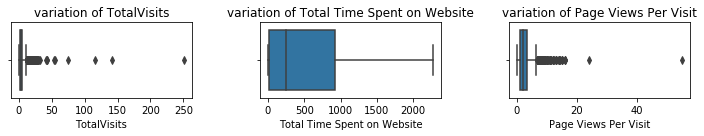

In [70]:
# analyzing the variation in the numerical variables using box plots
plt.figure(figsize=(10,2))
for index, column_name in enumerate(numerical_columns_list):
    plt.subplot(1,3,index+1)
    sns.boxplot(lead_dataframe[column_name])
    plt.title('variation of'+' '+column_name)
plt.tight_layout()
plt.show()

- From the above variations in box plots we can see that there exists no outliers in 'Total Time Spent on Website' column. Let's treat the outliers present in the columns

In [71]:
# analyzing the summary statistics of 'TotalVisits'
lead_dataframe['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [72]:
# analyzing the quantiles variation of 'TotalVisits'
lead_dataframe['TotalVisits'].quantile([0.10,0.25,0.50,0.75,0.80,0.90,0.95,0.99])

0.10     0.0
0.25     1.0
0.50     3.0
0.75     5.0
0.80     5.0
0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

- From summary statistics and quantile variations we can see that upto 99th percentile the variation in values is steady but there has been sudden increase in values from 99th percentile to max value. Hence it better to cap the values above 99th percentile using 99th percentile value.

In [73]:
# Capping of extreme outliers in 'TotalVisits'
lead_dataframe.loc[lead_dataframe['TotalVisits']> lead_dataframe['TotalVisits'].quantile(0.99),'TotalVisits'] = lead_dataframe['TotalVisits'].quantile(0.99)

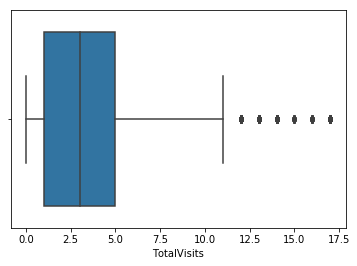

In [74]:
# analyzing the variation in box plot of the variable 'TotalVisits' after outlier treatment
sns.boxplot(lead_dataframe['TotalVisits'])

- From above we can see that the extreme outliers have been capped with the closed percentile value. Still there exists some outliers but these just continous high values.

In [75]:
# analyzing the summary statistics in 'Page Views Per Visit'
lead_dataframe['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [76]:
# analyzing the qunatile variation of 'Page Views Per Visit'
lead_dataframe['Page Views Per Visit'].quantile([0.10,0.25,0.50,0.75,0.80,0.90,0.95,0.99])

0.10    0.0
0.25    1.0
0.50    2.0
0.75    3.2
0.80    4.0
0.90    5.0
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

- From above summary statistics and quantile variation we can see that upto 99th percentile the values are steadily increasing there after there has been sudden jump between 99th percentile and max value. Hence cap the extreme outliers with 99th percentile value.

In [77]:
# Capping the extreme outliers
lead_dataframe.loc[lead_dataframe['Page Views Per Visit']> lead_dataframe['Page Views Per Visit'].quantile(0.99),'Page Views Per Visit'] = lead_dataframe['Page Views Per Visit'].quantile(0.99)

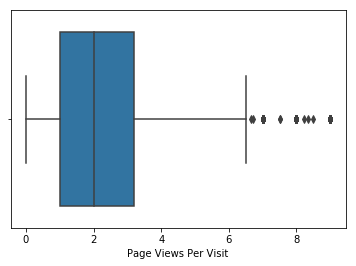

In [78]:
# analyzing the variation in box plot after outlier treatment
sns.boxplot(lead_dataframe['Page Views Per Visit'])

- From above we can see that the extreme outliers have been capped but still there exists some outliers which are just continous increasing high values.

#### Univariate analysis

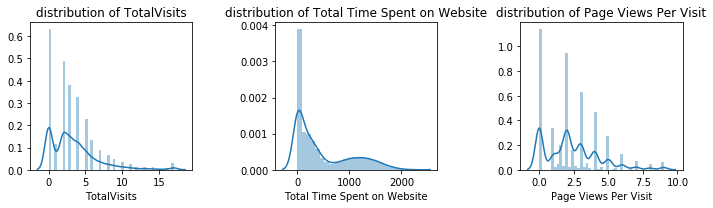

In [79]:
# analyzing the variation of the variables in distrubutions
plt.figure(figsize=(10,3))
for index, column_name in enumerate(numerical_columns_list):
    plt.subplot(1,3,index+1)
    sns.distplot(lead_dataframe[column_name])
    plt.title('distribution of'+' '+column_name)
plt.tight_layout()
plt.show()

- From the above distributions we can see that all the variables distributions are skewed to the right side and all variables corresponds to small standard deviation.

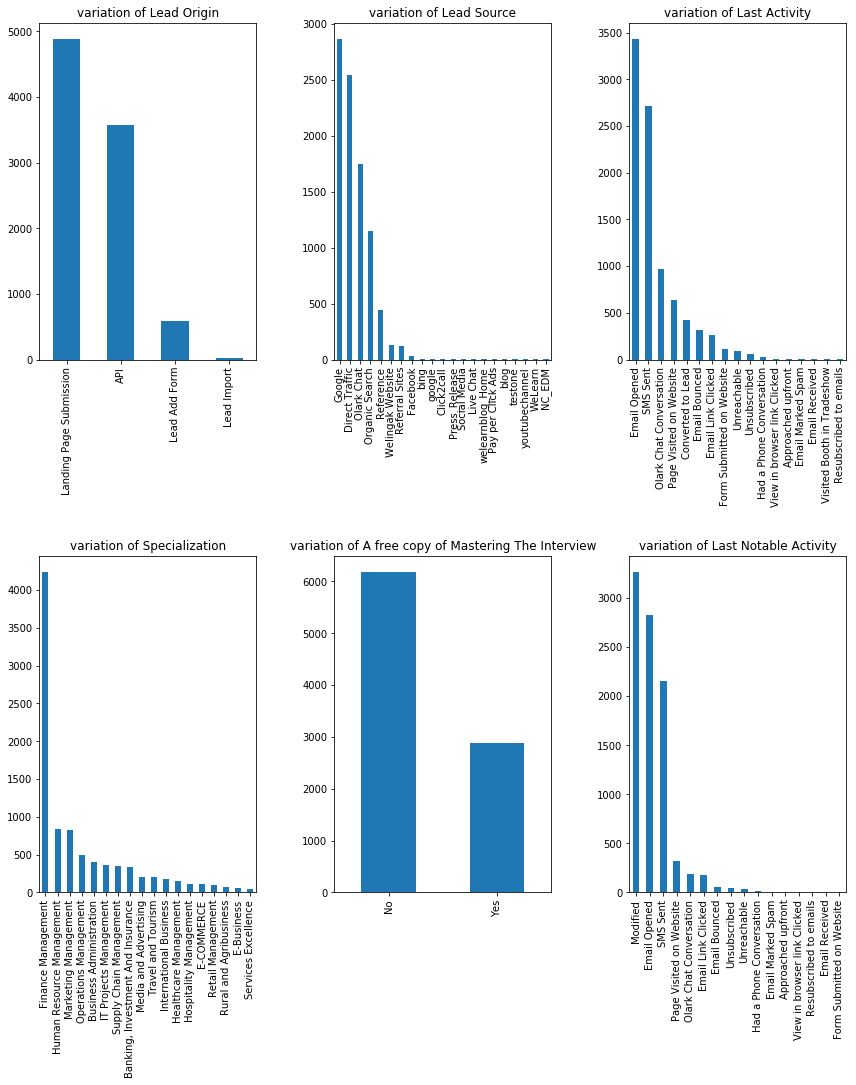

In [80]:
# analyzing the variation of categorical variables using bar plots
plt.figure(figsize=(12,20))
for index, column_name in enumerate(categorical_columns_list):
    plt.subplot(3,3,index+1)
    lead_dataframe[column_name].value_counts().plot.bar()
    plt.title('variation of'+' '+column_name)
    plt.tight_layout()
plt.show()

- From above bar plots we can see that variation of categorical variables across different classes present in them. From above we can also see that there exists significant varition across all classes within the variable. Hence no skewness is present in the variables.

#### Bivariate analysis

- Target variable/ Dependent variable : Converted
- Prospect ID and Lead number columns are just for the identification of customers
- Rest all other variables are predictor variables.

##### Analyzing the variation between the numerical variables and the target variable

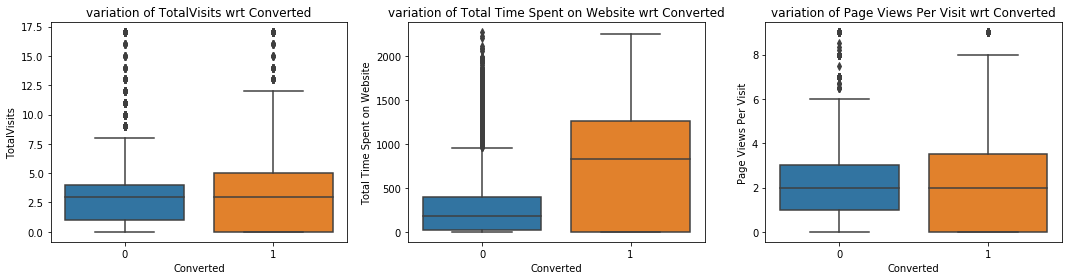

In [81]:
plt.figure(figsize=(15,4))
for index,column_name in enumerate(numerical_columns_list):
    plt.subplot(1,3,index+1)
    sns.boxplot('Converted',column_name,data = lead_dataframe)
    plt.title('variation of'+' '+column_name+' '+'wrt Converted')
    plt.tight_layout()
plt.show()

__The following observations can be made from the above plots:__
- If the total time spent on the website is more then there are more chances of conversion. 
- There exists no much variation between Total Visits and Pages Views per visit wrt Converted.

##### Analyzing the variation between converted and categorical variables

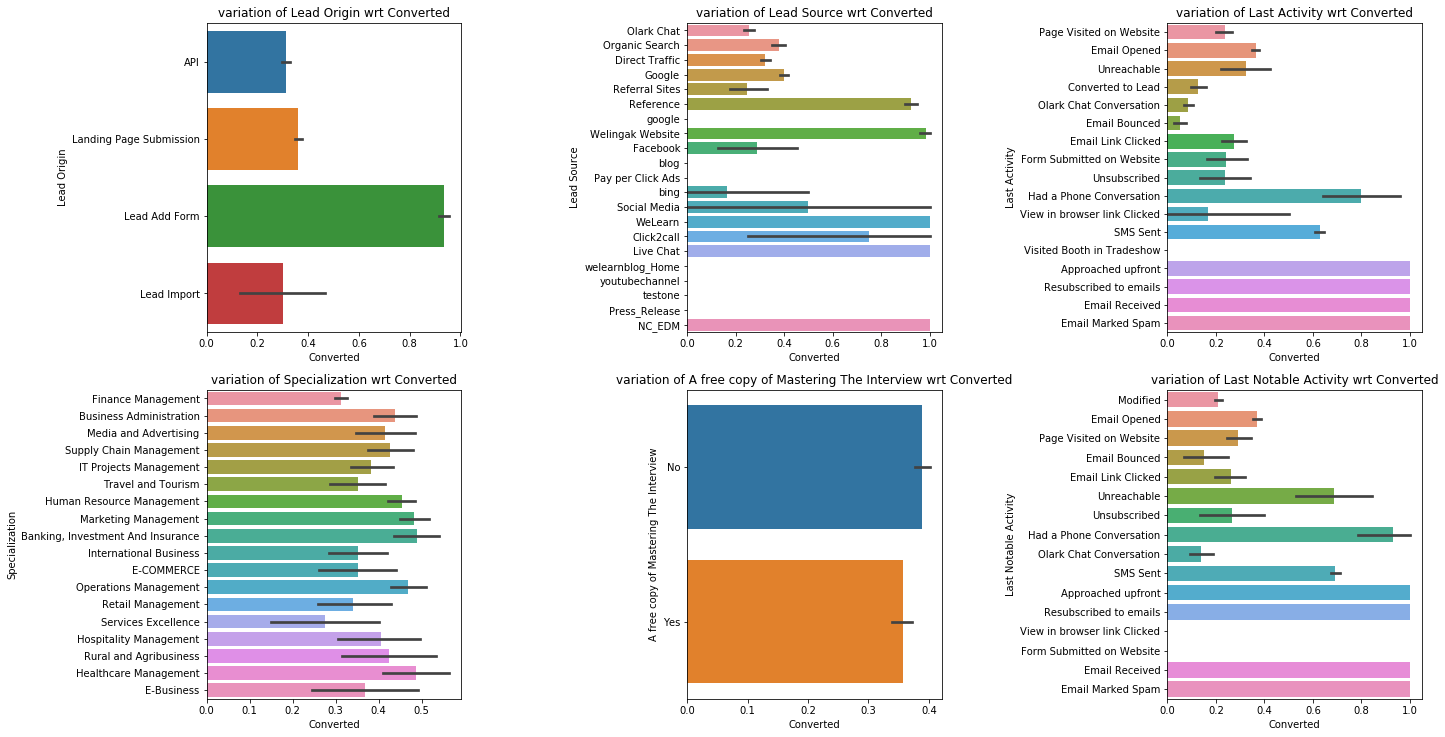

In [82]:
plt.figure(figsize=(20,15))
for index,column_name in enumerate(categorical_columns_list):
    plt.subplot(3,3,index+1)
    sns.barplot('Converted',column_name,data =lead_dataframe)
    plt.title('variation of'+' '+column_name+' '+'wrt Converted')
    plt.tight_layout()
plt.show()

- The above plote shows the variation between target variable and categorical variables.

- Before analyzing the pair wise correlations between variables lets create dummies for the variables.

## Data Preparation

#### Dummy variables creation

In [83]:
# analyzing the dataframe again
lead_dataframe.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,No,Modified


In [84]:
# analyzing column A free copy of Mastering The Interview
lead_dataframe['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

- From we have see that there exists only no classes within the variables. Hence encode the classes as 1's and 0's i.e. 1: Yes and 0: No

In [85]:
# Encoding the classes in A free copy of Mastering The Interview column
lead_dataframe.loc[lead_dataframe['A free copy of Mastering The Interview']== 'Yes','A free copy of Mastering The Interview'] = 1
lead_dataframe.loc[lead_dataframe['A free copy of Mastering The Interview']== 'No','A free copy of Mastering The Interview'] = 0

In [86]:
# analyzing Lead Origin column
lead_dataframe['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64

- From above variation we can see that there exists only small percentage of values in Lead Add Form and Lead Import. So let's combine those classes into one single class as it will be easy in dummy level labels creation.

In [87]:
# Combing classes into Lead Origin
lead_dataframe.loc[lead_dataframe['Lead Origin']== 'Lead Add Form', 'Lead Origin'] = 'Other Origin'
lead_dataframe.loc[lead_dataframe['Lead Origin']== 'Lead Import', 'Lead Origin'] = 'Other Origin'

In [88]:
# analyzing the variable after modifications
lead_dataframe['Lead Origin'].value_counts(normalize =True)*100

Landing Page Submission    53.835133
API                        39.431342
Other Origin                6.733524
Name: Lead Origin, dtype: float64

In [89]:
# Dummy creation in Lead origin column
origin_dummies = pd.get_dummies(lead_dataframe['Lead Origin'])
# Dropping other origin column
origin_dummies.drop('Other Origin', axis=1, inplace = True)
# analyzing the origin dummies
origin_dummies.head()

,API,Landing Page Submission
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [90]:
# analyzing the Lead Source column
lead_dataframe['Lead Source'].value_counts(normalize = True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
welearnblog_Home      0.011020
Pay per Click Ads     0.011020
blog                  0.011020
testone               0.011020
youtubechannel        0.011020
WeLearn               0.011020
NC_EDM                0.011020
Name: Lead Source, dtype: float64

- From above we can see that there exists very small percentage of classes. Such all classess can be combined together to make into one class so as to have simpler dummy variables creation.

In [91]:
# Combining the classes in Lead Source
lead_dataframe.loc[lead_dataframe['Lead Source']=='Reference','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='Welingak Website','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='Referral Sites','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='Facebook','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='bing','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='google','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='Click2call','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='Live Chat','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='Social Media','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='Press_Release','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='youtubechannel','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='testone','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='WeLearn','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='welearnblog_Home','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='Pay per Click Ads','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='blog','Lead Source'] = 'Other Sources'
lead_dataframe.loc[lead_dataframe['Lead Source']=='NC_EDM','Lead Source'] = 'Other Sources'

In [92]:
# analyzing the column after modification
lead_dataframe['Lead Source'].value_counts(normalize=True)*100

Google            31.606789
Direct Traffic    28.025127
Olark Chat        19.318933
Organic Search    12.717655
Other Sources      8.331497
Name: Lead Source, dtype: float64

In [93]:
# Creating dummies for Lead Source
source_dummies = pd.get_dummies(lead_dataframe['Lead Source'])
# dropping Other Sources column
source_dummies.drop('Other Sources', axis = 1, inplace=True)
# analyzing the source_dummies
source_dummies.head()

,Direct Traffic,Google,Olark Chat,Organic Search
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0


In [94]:
# analyzing the Last Activity column
lead_dataframe['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Marked Spam                0.022041
Email Received                   0.022041
Visited Booth in Tradeshow       0.011020
Resubscribed to emails           0.011020
Name: Last Activity, dtype: float64

- From above we can see that there exists many small percentage classes. It is better all such classes into one class for easy dummification process.

In [95]:
# combining classes in Last Activity
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Olark Chat Conversation', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Page Visited on Website', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Converted to Lead', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Email Bounced', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Email Link Clicked', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Form Submitted on Website', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Unreachable', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Unsubscribed', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Had a Phone Conversation', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'View in browser link Clicked', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Approached upfront', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Email Marked Spam', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Email Received', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Visited Booth in Tradeshow', 'Last Activity'] = 'Other Last Activity'
lead_dataframe.loc[lead_dataframe['Last Activity']== 'Resubscribed to emails', 'Last Activity'] = 'Other Last Activity'

In [96]:
# analyzing the variable after modifications
lead_dataframe['Last Activity'].value_counts(normalize=True)*100

Email Opened           37.822350
Other Last Activity    32.245978
SMS Sent               29.931673
Name: Last Activity, dtype: float64

In [97]:
# creating dummies in Last Activity column
activity_dummies = pd.get_dummies(lead_dataframe['Last Activity'])
# Dropping Olark Chat Conversation
activity_dummies.drop('Other Last Activity',axis=1,inplace=True)
# analyzing activity dummies
activity_dummies.head()

,Email Opened,SMS Sent
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0


In [98]:
# analyzing Specialization column
lead_dataframe['Specialization'].value_counts(normalize=True)*100

Finance Management                   46.737933
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Media and Advertising                 2.226141
Travel and Tourism                    2.226141
International Business                1.939608
Healthcare Management                 1.719198
Hospitality Management                1.223275
E-COMMERCE                            1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

- From above we can see that there exists many small percentage classes which can be combined together to make into one class which will be easy for dummy variables creation.

In [99]:
# Combining classes in specialization
lead_dataframe.loc[lead_dataframe['Specialization']== 'E-COMMERCE','Specialization'] = 'Other Specialization'
lead_dataframe.loc[lead_dataframe['Specialization']== 'International Business','Specialization'] = 'Other Specialization'
lead_dataframe.loc[lead_dataframe['Specialization']== 'Healthcare Management','Specialization'] = 'Other Specialization'
lead_dataframe.loc[lead_dataframe['Specialization']== 'Retail Management','Specialization'] = 'Other Specialization'
lead_dataframe.loc[lead_dataframe['Specialization']== 'Rural and Agribusiness','Specialization'] = 'Other Specialization'
lead_dataframe.loc[lead_dataframe['Specialization']== 'E-Business','Specialization'] = 'Other Specialization'
lead_dataframe.loc[lead_dataframe['Specialization']== 'Services Excellence','Specialization'] = 'Other Specialization'
lead_dataframe.loc[lead_dataframe['Specialization']== 'Hospitality Management','Specialization'] = 'Other Specialization'

In [100]:
# analyzing the column after modifications
lead_dataframe['Specialization'].value_counts(normalize=True)*100

Finance Management                   46.737933
Human Resource Management             9.224157
Other Specialization                  9.080890
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Media and Advertising                 2.226141
Travel and Tourism                    2.226141
Name: Specialization, dtype: float64

In [101]:
# Creating dummies in Specialization variable
specialization_dummies = pd.get_dummies(lead_dataframe['Specialization'])
# Dropping Travel and Tourism
specialization_dummies.drop('Other Specialization',axis = 1, inplace=True)
# analyzing the specialization dummies
specialization_dummies.head()

,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [102]:
# analyzing the Last Notable Activity column
lead_dataframe['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
View in browser link Clicked     0.011020
Resubscribed to emails           0.011020
Email Received                   0.011020
Form Submitted on Website        0.011020
Name: Last Notable Activity, dtype: float64

- From above we can see there exists many small pecentage classes which can be combined together to create one single class which will be helpful in dummy variable creation.

In [103]:
# Combining the classes in Last Notable activity
lead_dataframe.loc[lead_dataframe['Last Notable Activity']== 'Page Visited on Website','Last Notable Activity'] = 'Other Last Notable Activity'
lead_dataframe.loc[lead_dataframe['Last Notable Activity']== 'Olark Chat Conversation','Last Notable Activity'] = 'Other Last Notable Activity'
lead_dataframe.loc[lead_dataframe['Last Notable Activity']== 'Email Link Clicked','Last Notable Activity'] = 'Other Last Notable Activity'
lead_dataframe.loc[lead_dataframe['Last Notable Activity']== 'Email Bounced','Last Notable Activity'] = 'Other Last Notable Activity'
lead_dataframe.loc[lead_dataframe['Last Notable Activity']== 'Unsubscribed','Last Notable Activity'] = 'Other Last Notable Activity'
lead_dataframe.loc[lead_dataframe['Last Notable Activity']== 'Unreachable','Last Notable Activity'] = 'Other Last Notable Activity'
lead_dataframe.loc[lead_dataframe['Last Notable Activity']== 'Had a Phone Conversation','Last Notable Activity'] = 'Other Last Notable Activity'
lead_dataframe.loc[lead_dataframe['Last Notable Activity']== 'Email Marked Spam','Last Notable Activity'] = 'Other Last Notable Activity'
lead_dataframe.loc[lead_dataframe['Last Notable Activity']== 'Resubscribed to emails','Last Notable Activity'] = 'Other Last Notable Activity'
lead_dataframe.loc[lead_dataframe['Last Notable Activity']== 'View in browser link Clicked','Last Notable Activity'] = 'Other Last Notable Activity'
lead_dataframe.loc[lead_dataframe['Last Notable Activity']== 'Form Submitted on Website','Last Notable Activity'] = 'Other Last Notable Activity'
lead_dataframe.loc[lead_dataframe['Last Notable Activity']== 'Email Received','Last Notable Activity'] = 'Other Last Notable Activity'
lead_dataframe.loc[lead_dataframe['Last Notable Activity']== 'Approached upfront','Last Notable Activity'] = 'Other Last Notable Activity'

In [104]:
# checking the column after modifications
lead_dataframe['Last Notable Activity'].value_counts(normalize=True)*100

Modified                       36.003967
Email Opened                   31.110866
SMS Sent                       23.716112
Other Last Notable Activity     9.169054
Name: Last Notable Activity, dtype: float64

In [105]:
# creating dummies for the Last notable activity column
notable_dummies = pd.get_dummies(lead_dataframe['Last Notable Activity'])
# dropping other last notable activity class from the dummies
notable_dummies.drop('Other Last Notable Activity',axis=1,inplace =True)
# modifying the column names of the dummy dataframe
notable_dummies.columns = ['Email_Opened_notable','Modified_notable','SMS_Sent_notable']
# analyzing the notable dummies
notable_dummies.head()

,Email_Opened_notable,Modified_notable,SMS_Sent_notable
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [106]:
# Combining all the dummies dataframes created into single dataframe
dummies_dataframe = pd.concat([origin_dummies,source_dummies,activity_dummies,specialization_dummies,notable_dummies],axis = 1)
# analyzing the dummies dataframe
dummies_dataframe.head()

,API,Landing Page Submission,Direct Traffic,Google,Olark Chat,Organic Search,Email Opened,SMS Sent,"Banking, Investment And Insurance",Business Administration,...,Human Resource Management,IT Projects Management,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Email_Opened_notable,Modified_notable,SMS_Sent_notable
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [107]:
# creating the copy of lead dataframe
original_dataframe = lead_dataframe.copy()
# analyzing the original dataframe
original_dataframe.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Other Last Activity,Finance Management,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Last Activity,Media and Advertising,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Other Last Activity,Finance Management,0,Modified


In [108]:
# concatenation of lead dataframe and dummies dataframe
lead_dataframe = pd.concat([lead_dataframe,dummies_dataframe],axis = 1)
# analyzing the dataframe
lead_dataframe.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Human Resource Management,IT Projects Management,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Email_Opened_notable,Modified_notable,SMS_Sent_notable
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Other Last Activity,Finance Management,...,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,...,0,0,0,0,0,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Last Activity,Media and Advertising,...,0,0,0,1,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Other Last Activity,Finance Management,...,0,0,0,0,0,0,0,0,1,0


In [109]:
# Dropping original columns
lead_dataframe.drop(['Lead Origin', 'Lead Source','Last Activity', 'Specialization','Last Activity', 'Last Notable Activity'],axis =1, inplace = True)

In [110]:
# analyzing the dataframe after dropping columns
lead_dataframe.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Direct Traffic,...,Human Resource Management,IT Projects Management,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Email_Opened_notable,Modified_notable,SMS_Sent_notable
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [111]:
# checking the percentage to check whether any data imbalance
(lead_dataframe['Converted'].sum()/lead_dataframe.shape[0])*100

37.85541106458012

- From above percentage we can see that there exists about 37% of 1's and remaining 63% of 0's. It cannot be considered data balance condition at the same time cannot be considered even highly data imbalance situation. As of now we not need to deal in balancing the data. We can proceed in our analysis without making any changes.

### Test Train Split

In [112]:
# Creating X and Y variables
y = lead_dataframe['Converted']
X = lead_dataframe.iloc[:, 3:]

In [113]:
# Creating test train split
X_train, X_test, y_train ,y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30, random_state = 100)

In [114]:
# analyzing X_train
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Direct Traffic,Google,Olark Chat,Organic Search,...,Human Resource Management,IT Projects Management,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Email_Opened_notable,Modified_notable,SMS_Sent_notable
3009,2.0,397,2.0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1012,2.0,190,2.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.0,0,0.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4750,2.0,1380,2.0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7987,5.0,1584,2.5,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [115]:
# analyzing y_train
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

In [116]:
# analyzing the shape of X_train
X_train.shape

(6351, 25)

In [117]:
# analyzing shape of the X_test
X_test.shape

(2723, 25)

In [118]:
# considering a copy of X_test
X_test_copy = X_test.copy()

- The reason for considering a copy of X_test as it will be helpful in comparison between the variables and the scorecard created on the test data.

### Feature Scaling

In [119]:
# creating scaler object using Standard Scaler
scaler = StandardScaler()
# fitting the data on top of the scaler object
X_train[numerical_columns_list] = scaler.fit_transform(X_train[numerical_columns_list])
# analyzing X_train after scaling
X_train.head()

C:\Users\saimmidi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\saimmidi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Direct Traffic,Google,Olark Chat,Organic Search,...,Human Resource Management,IT Projects Management,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Email_Opened_notable,Modified_notable,SMS_Sent_notable
3009,-0.417238,-0.160255,-0.177298,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1012,-0.417238,-0.540048,-0.177298,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-1.034493,-0.888650,-1.183128,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4750,-0.417238,1.643304,-0.177298,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7987,0.508645,2.017593,0.074159,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Analyzing Correlations

######  Analyzing pair-wise correlations in X_train

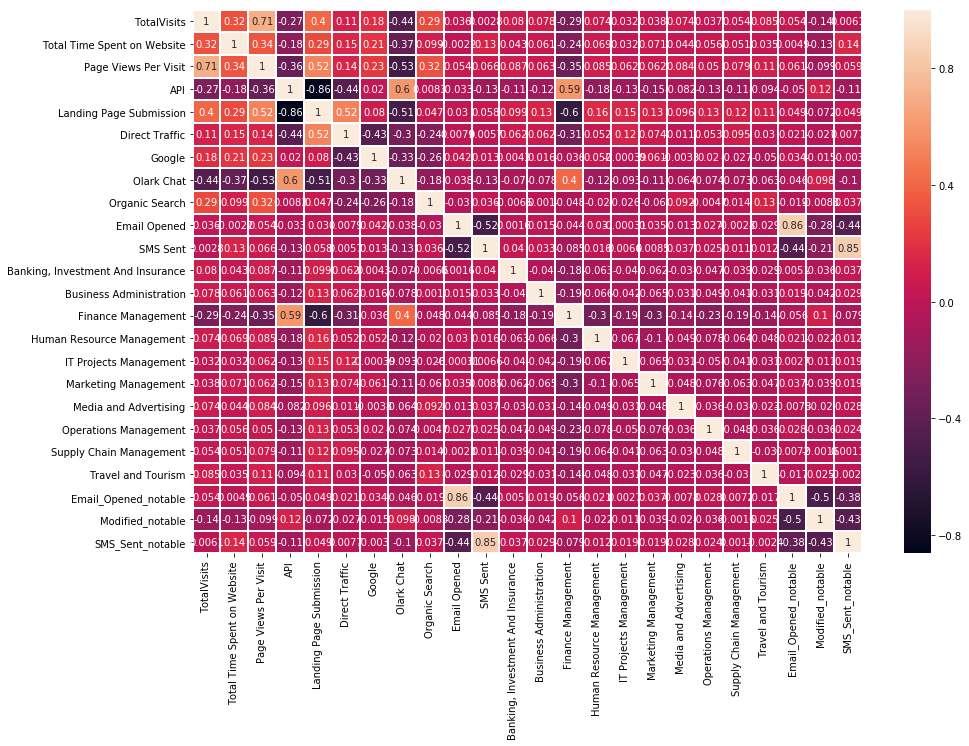

In [120]:
# creating correlation matrix of X_train
correlation_matrix = X_train.corr()
# plotting heatmap using correlation matrix for X_train
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot = True, linecolor= 'white', linewidths= 1)

- From the above heatmap we can see that there exists only few strong positive and negative correlations between the variables. Let's remove one of the class among the pairs having strong correlations between them.

###### Analyzing the pair-wise correlations between variables in X_test

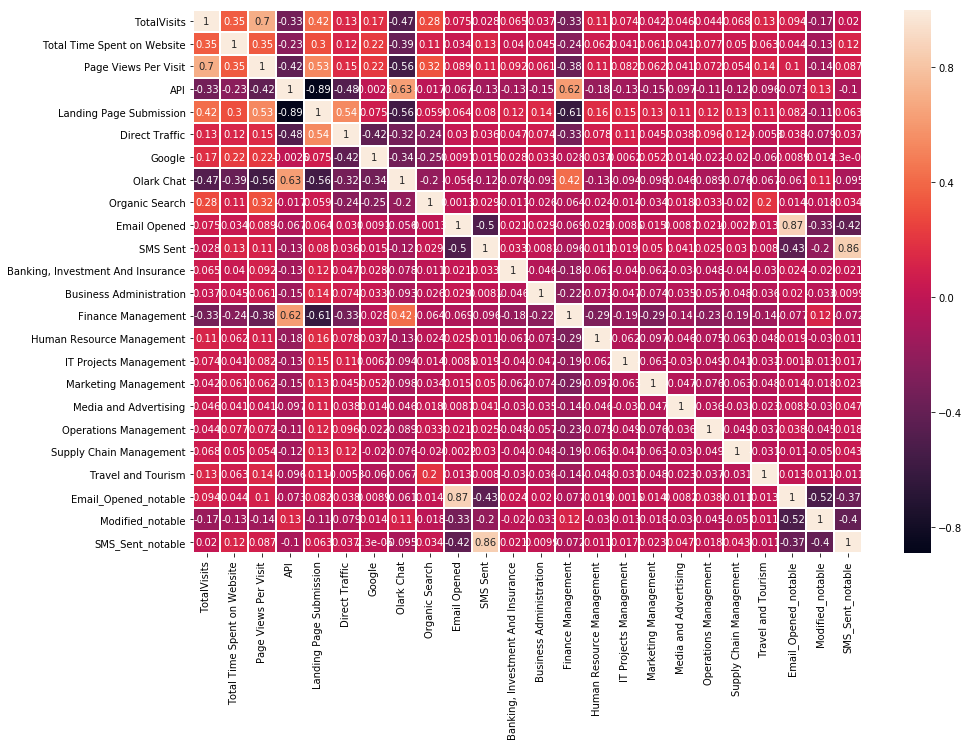

In [121]:
# creating X_test matrix
correlation_matrix_test = X_test.corr()
# plotting heatmap using correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix_test, annot= True, linecolor= 'white', linewidths= 1)

- From above pair-wise correlations in X_test we can see strong negative and positive correlation between the same variables as seen in X_train. Hence let's drop one of the variable from the pair having strong correlations between them in both X_train and X_test.

In [122]:
# Dropping strongly correlated variables in X_train and X_test
X_train.drop(['Email_Opened_notable','SMS_Sent_notable'], axis = 1, inplace = True)
X_test.drop(['Email_Opened_notable','SMS_Sent_notable'], axis = 1, inplace = True)

- Though there exists some other variables which are strongly correlated with each other. Let's not take any rule as of now in removing such variables. Upon model building we can further eliminate such variables.

## Model Building

- Training the model using train dataset and then testing the model using validation test. Model building is done in two steps:
    - First using automated feature selection the top features are selected (Coarse Selection)
    - Then performing manual feature elimination considering p values and vif values of variables (Fine selection).<br>
- Using GLM let's start building the model.

In [123]:
# analyzing X_train 
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Direct Traffic,Google,Olark Chat,Organic Search,...,Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Modified_notable
3009,-0.417238,-0.160255,-0.177298,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,-0.417238,-0.540048,-0.177298,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9226,-1.034493,-0.888650,-1.183128,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4750,-0.417238,1.643304,-0.177298,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7987,0.508645,2.017593,0.074159,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


#### Automated Feature Selection using RFE

In [124]:
# Intializing model object using Logistic Regression
logreg1 = LogisticRegression()
# Fitting the data on top of the model
logreg1 = logreg1.fit(X_train, y_train)

In [125]:
# Performing RFE on the model created
rfe = RFE(logreg1,15) # Considering top 15 features out of all other features
# Fitting the data on top of the rfe object
rfe = rfe.fit(X_train,y_train)

In [126]:
# analyzing the top 15 features resulted upon performing RFE along with their rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 8),
 ('API', True, 1),
 ('Landing Page Submission', True, 1),
 ('Direct Traffic', True, 1),
 ('Google', True, 1),
 ('Olark Chat', True, 1),
 ('Organic Search', True, 1),
 ('Email Opened', True, 1),
 ('SMS Sent', True, 1),
 ('Banking, Investment And Insurance', True, 1),
 ('Business Administration', False, 9),
 ('Finance Management', True, 1),
 ('Human Resource Management', False, 5),
 ('IT Projects Management', False, 4),
 ('Marketing Management', True, 1),
 ('Media and Advertising', False, 6),
 ('Operations Management', False, 3),
 ('Supply Chain Management', False, 2),
 ('Travel and Tourism', False, 7),
 ('Modified_notable', True, 1)]

In [127]:
# creating list of columns selected using rfe process
rfe_columns_list = list(X_train.columns[rfe.support_])
# analyzing the rfe_list
rfe_columns_list

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'API',
 'Landing Page Submission',
 'Direct Traffic',
 'Google',
 'Olark Chat',
 'Organic Search',
 'Email Opened',
 'SMS Sent',
 'Banking, Investment And Insurance',
 'Finance Management',
 'Marketing Management',
 'Modified_notable']

In [128]:
# modifying the X_train with the columns selected from the RFE process
X_train = X_train[rfe_columns_list]
# analyzing the X_train
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,API,Landing Page Submission,Direct Traffic,Google,Olark Chat,Organic Search,Email Opened,SMS Sent,"Banking, Investment And Insurance",Finance Management,Marketing Management,Modified_notable
3009,-0.417238,-0.160255,-0.177298,0,1,1,0,0,0,1,0,0,1,0,0
1012,-0.417238,-0.540048,-0.177298,0,1,1,0,0,0,0,0,0,1,0,0
9226,-1.034493,-0.888650,-1.183128,1,0,0,0,1,0,0,1,0,1,0,1
4750,-0.417238,1.643304,-0.177298,0,1,1,0,0,0,0,1,0,0,1,0
7987,0.508645,2.017593,0.074159,0,1,1,0,0,0,0,1,0,1,0,1


#### First model

In [129]:
# adding constant to X_train
X_train_sm = sm.add_constant(X_train)
# initializing model object using GLM
logreg_model_1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
# fitting the data on top of the model
logreg_model_1  = logreg_model_1.fit()
# checking the summary statistics of the model
logreg_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.8
Date:                Sat, 30 May 2020   Deviance:                       5697.6
Time:                        00:09:19   Pearson chi2:                 6.55e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 2.7198      0.205     13.248      0.000       2.317       3.122
TotalVisits                           0.2478      0.046      5.352      0.000       0.157       0.339
Total Time Spent on Website           1.1333      0.039     28.801      0.000       1.056       1.210
Page Views Per Visit                 -0.1990      0.054     -3.717      0.000      -0.304      -0.094
API                                  -3.7762      0.334    -11.309      0.000      -4.431      -3.122
Landing Page Submission              -4.2365      0.343    -12.361      0.000      -4.908      -3.565
Direct Traffic                       -0.2198      0.287     -0.765      0.444      -0.783       0.343
Google                                0.1905      0.280      0.680      0.497      -0.359       0.740
Olark Chat                            1.0552      0.298      3.540      0.000       0.471       1.639
Organic Search                       -0.0721      0.289     -0.250      0.803      -0.639       0.494
Email Opened                          0.5630      0.095      5.950      0.000       0.378       0.748
SMS Sent                              1.7213      0.097     17.677      0.000       1.530       1.912
Banking, Investment And Insurance     0.2671      0.173      1.541      0.123      -0.073       0.607
Finance Management                   -0.5507      0.091     -6.068      0.000      -0.729      -0.373
Marketing Management                  0.2974      0.118      2.524      0.012       0.066       0.528
Modified_notable                     -0.8703      0.082    -10.659      0.000      -1.030      -0.710
=====================================================================================================
"""

- From above summary statistics of the model we can see that some of the variables are insignificant as per their p values. Hence we need to perform manual feature elimination. Before performing manual feature elimination let's look at the metrics like accuracy and confusion matrix in order to keep a track of the metrics when performing manual feature elimination.

In [130]:
# making predictions using model on train dataset
y_train_pred_prob_1  = logreg_model_1.predict(X_train_sm)

In [131]:
# analyzing the probability predictions made by the model on X_train
y_train_pred_prob_1.head()

3009    0.121972
1012    0.048924
9226    0.325391
4750    0.888597
7987    0.723446
dtype: float64

In [132]:
# creating a dataframe including actual, pred_prob
pred_dataframe_1 = pd.DataFrame()
pred_dataframe_1['Actual_labels'] = y_train
pred_dataframe_1['Pred_prob'] = y_train_pred_prob_1
# resetting the index of the dataframe
pred_dataframe_1 = pred_dataframe_1.reset_index()
# renaming the columns of the dataframe
pred_dataframe_1.columns = ['Cust_index','Actual_labels','Pred_prob']
# analyzing pred_dataframe
pred_dataframe_1.head()

,Cust_index,Actual_labels,Pred_prob
0,3009,0,0.121972
1,1012,0,0.048924
2,9226,0,0.325391
3,4750,1,0.888597
4,7987,1,0.723446


- Now considering some random threshold probability value for finding out the class labels from the probability predictions made by the model. Let's consider 0.5 as the random threshold probability as of now but later using other metrics we will calculate actual threshold probability

In [133]:
# adding column for the predicted labels using predicted probabilities
pred_dataframe_1['Pred_labels'] = pred_dataframe_1['Pred_prob'].apply(lambda x: 1 if x>= 0.5 else 0)
# analyzing the dataframe after addition of column
pred_dataframe_1.head()

,Cust_index,Actual_labels,Pred_prob,Pred_labels
0,3009,0,0.121972,0
1,1012,0,0.048924,0
2,9226,0,0.325391,0
3,4750,1,0.888597,1
4,7987,1,0.723446,1


In [134]:
# Building confusion matrix based on the random choosen threshold prob value
confusion_matrix_train = confusion_matrix(pred_dataframe_1['Actual_labels'],pred_dataframe_1['Pred_labels'])
# analyzing the confusion matrix
confusion_matrix_train

array([[3413,  492],
       [ 773, 1673]], dtype=int64)

In [135]:
# analyzing the accuracy score from confusion matrix of the first model
accuracy_value_1 = accuracy_score(pred_dataframe_1['Actual_labels'], pred_dataframe_1['Pred_labels'])
# analyzing the accuracy value
accuracy_value_1

0.8008187686978429

- From above we can see that the accuracy score is decent value but accuracy score cannot be alone considered for the evaluation of the model as it will be taking into consideration of both positives and negatives. Hence we should look for other metrics like Precision and Recall as well as the business case study once final model has been built.

- Upon keeping track of the accuracy metric we can proceed further with manual feature elimination as their exists some insignificant features and also features with high VIF scores which needed to be eliminated in order to have a stable model.

In [136]:
# checking the vifs
# creating dataframe for vif
vif_dataframe = pd.DataFrame()
# creating a column for variables present in the model
vif_dataframe['Features'] = list(X_train.columns)
# creating a column for vif scores
vif_dataframe['VIF_score'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
# sorting the values based on the vif values
vif_dataframe.sort_values('VIF_score', ascending = False, inplace = True)
# analyzing the vif _dataframe
vif_dataframe

,Features,VIF_score
4,Landing Page Submission,38.978807
3,API,28.127792
6,Google,21.044319
5,Direct Traffic,19.329772
7,Olark Chat,13.659653
8,Organic Search,8.890043
12,Finance Management,3.175225
2,Page Views Per Visit,2.563236
9,Email Opened,2.279912
0,TotalVisits,2.159489


- From above VIF score we can see that there exists some variables which have vif values which is an indication that there exists strong multicolinearity between that particular variable and remaining other variables. So let's drop the feature having high vif value.

In [137]:
# Dropping Landing Page Submission column from X_train
X_train.drop('Landing Page Submission', axis =1, inplace = True)

- Rebuilding the model again using remaining variables

#### Second Model

In [138]:
# adding constant to X_train
X_train_sm = sm.add_constant(X_train)
# initializing model object
logreg_model_2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
# fitting the model
logreg_model_2 = logreg_model_2.fit()
# analyzing the summary of the model
logreg_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2941.4
Date:                Sat, 30 May 2020   Deviance:                       5882.7
Time:                        00:09:19   Pearson chi2:                 6.59e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.4161      0.153      9.252      0.000       1.116       1.716
TotalVisits                           0.1892      0.046      4.138      0.000       0.100       0.279
Total Time Spent on Website           1.0977      0.039     28.173      0.000       1.021       1.174
Page Views Per Visit                 -0.3783      0.052     -7.251      0.000      -0.481      -0.276
API                                   0.0544      0.102      0.532      0.595      -0.146       0.255
Direct Traffic                       -3.1455      0.144    -21.816      0.000      -3.428      -2.863
Google                               -2.5909      0.143    -18.071      0.000      -2.872      -2.310
Olark Chat                           -1.8639      0.156    -11.912      0.000      -2.171      -1.557
Organic Search                       -2.7289      0.170    -16.056      0.000      -3.062      -2.396
Email Opened                          0.6469      0.093      6.939      0.000       0.464       0.830
SMS Sent                              1.8145      0.096     18.909      0.000       1.626       2.003
Banking, Investment And Insurance     0.3353      0.170      1.974      0.048       0.002       0.668
Finance Management                   -0.4841      0.088     -5.507      0.000      -0.656      -0.312
Marketing Management                  0.3230      0.116      2.792      0.005       0.096       0.550
Modified_notable                     -0.8868      0.080    -11.119      0.000      -1.043      -0.730
=====================================================================================================
"""

- From above summary statistics we can still see that some of the variables are insignificant based on their p values. Let's check for accuracy metrics and then check for the vif values.

In [139]:
#making predictions on the train dataset using model_2
y_train_pred_prob_2 = logreg_model_2.predict(X_train_sm)
# analyzing the probability predictions made by the model
y_train_pred_prob_2.head()

3009    0.147479
1012    0.056344
9226    0.337699
4750    0.900247
7987    0.730471
dtype: float64

In [140]:
# creating dataframe which includes actual values, pred_prob
pred_dataframe_2 = pd.DataFrame()
# adding column for actual labels
pred_dataframe_2['Actual_labels'] = y_train
# adding column of pred_prob
pred_dataframe_2['Pred_prob'] = y_train_pred_prob_2
# resetting the index of the dataframe
pred_dataframe_2 = pred_dataframe_2.reset_index()
# renaming the column names of the dataframe
pred_dataframe_2.columns = ['Cust_index','Actual_labels','Pred_prob']
# analyzing the dataframe
pred_dataframe_2.head()

,Cust_index,Actual_labels,Pred_prob
0,3009,0,0.147479
1,1012,0,0.056344
2,9226,0,0.337699
3,4750,1,0.900247
4,7987,1,0.730471


In [141]:
# creating column for Pred_labels
pred_dataframe_2['Pred_labels'] = pred_dataframe_2['Pred_prob'].apply(lambda x: 1 if x>= 0.5 else 0)

In [142]:
# making confusion matrix
confusion_matrix_2 = confusion_matrix(pred_dataframe_2['Actual_labels'], pred_dataframe_2['Pred_labels'])
# analyzing the confusion matrix
confusion_matrix_2

array([[3363,  542],
       [ 799, 1647]], dtype=int64)

In [143]:
# analyzing the accuracy value
accuracy_value_2 = accuracy_score(pred_dataframe_2['Actual_labels'], pred_dataframe_2['Pred_labels'])
accuracy_value_2

0.7888521492678319

- when compared to previous model accuracy we can see that there has been slight 1% decrease in value which is not a big fall in accuracy. Hence it is an indication that no explanatory variables have been dropped from previous to now.

In [144]:
# checking the vifs
# creating dataframe for vif
vif_dataframe = pd.DataFrame()
# creating a column for variables present in the model
vif_dataframe['Features'] = list(X_train.columns)
# creating a column for vif scores
vif_dataframe['VIF_score'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
# sorting the values based on the vif values
vif_dataframe.sort_values('VIF_score', ascending = False, inplace = True)
# analyzing the vif _dataframe
vif_dataframe

,Features,VIF_score
3,API,3.952122
11,Finance Management,3.145441
6,Olark Chat,3.047826
5,Google,3.033998
2,Page Views Per Visit,2.515101
4,Direct Traffic,2.198118
8,Email Opened,2.190635
0,TotalVisits,2.138257
7,Organic Search,1.989133
9,SMS Sent,1.919015


- From the above VIF score and summary statistics we can see that API feature has high VIF score and alos insignificant variable. So let's drop API feature.

In [145]:
# Dropping API from X_train
X_train.drop('API', axis =1, inplace = True)

- Rebuilding the model using the remaining variables

#### Third Model

In [146]:
# adding constant to X_train
X_train_sm = sm.add_constant(X_train)
# initialing the model object on top of the data
logreg_model_3 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
# fitting the model
logreg_model_3 = logreg_model_3.fit()
# analyzing the summary statistics
logreg_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2941.5
Date:                Sat, 30 May 2020   Deviance:                       5883.0
Time:                        00:09:20   Pearson chi2:                 6.59e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.4115      0.153      9.236      0.000       1.112       1.711
TotalVisits                           0.1899      0.046      4.155      0.000       0.100       0.279
Total Time Spent on Website           1.0991      0.039     28.264      0.000       1.023       1.175
Page Views Per Visit                 -0.3813      0.052     -7.349      0.000      -0.483      -0.280
Direct Traffic                       -3.1421      0.144    -21.811      0.000      -3.424      -2.860
Google                               -2.5735      0.140    -18.437      0.000      -2.847      -2.300
Olark Chat                           -1.8237      0.137    -13.310      0.000      -2.092      -1.555
Organic Search                       -2.7090      0.166    -16.341      0.000      -3.034      -2.384
Email Opened                          0.6461      0.093      6.932      0.000       0.463       0.829
SMS Sent                              1.8122      0.096     18.906      0.000       1.624       2.000
Banking, Investment And Insurance     0.3376      0.170      1.989      0.047       0.005       0.670
Finance Management                   -0.4638      0.079     -5.860      0.000      -0.619      -0.309
Marketing Management                  0.3258      0.116      2.820      0.005       0.099       0.552
Modified_notable                     -0.8856      0.080    -11.110      0.000      -1.042      -0.729
=====================================================================================================
"""

- From above summary statistics we can see that for Banking, Investment And Insurance column the p value of the feature is close to 0.05 which is an indication that the feature is statistically insignificant in modelling. let's look at the metrics and then the VIF scores before considering any infrom decision.

In [147]:
# making predictions on the train dataset using the model
y_train_pred_prob_3 = logreg_model_3.predict(X_train_sm)
# analyzing the probability predictions
y_train_pred_prob_3.head()

3009    0.149816
1012    0.057347
9226    0.338171
4750    0.900418
7987    0.734572
dtype: float64

In [148]:
# creating a dataframe including actual labels and pred_prob
pred_dataframe_3 = pd.DataFrame()
# adding column for actual labels
pred_dataframe_3['Actual_labels'] = y_train
# adding column for pred_prob
pred_dataframe_3['Pred_prob'] = y_train_pred_prob_3
# resetting the dataframe
pred_dataframe_3 = pred_dataframe_3.reset_index()
# renaming the column
pred_dataframe_3.columns = ['Cust_index','Actual_labels','Pred_prob']
# analyzing the dataframe
pred_dataframe_3.head()

,Cust_index,Actual_labels,Pred_prob
0,3009,0,0.149816
1,1012,0,0.057347
2,9226,0,0.338171
3,4750,1,0.900418
4,7987,1,0.734572


In [149]:
# adding column for pred_labels
pred_dataframe_3['Pred_labels'] = pred_dataframe_3['Pred_prob'].apply(lambda x: 1 if x>= 0.5 else 0)
# analyzing the daaframe after addition
pred_dataframe_3.head()

,Cust_index,Actual_labels,Pred_prob,Pred_labels
0,3009,0,0.149816,0
1,1012,0,0.057347,0
2,9226,0,0.338171,0
3,4750,1,0.900418,1
4,7987,1,0.734572,1


In [150]:
# measuring the accuracy value
accuracy_value_3 = accuracy_score(pred_dataframe_3['Actual_labels'], pred_dataframe_3['Pred_labels'])
accuracy_value_3

0.788379782711384

- Upon comparison with previous accuracy there has been no significant decrease in accuracy hence no explanatory variables are removed.

In [151]:
# checking the vifs
# creating dataframe for vif
vif_dataframe = pd.DataFrame()
# creating a column for variables present in the model
vif_dataframe['Features'] = list(X_train.columns)
# creating a column for vif scores
vif_dataframe['VIF_score'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
# sorting the values based on the vif values
vif_dataframe.sort_values('VIF_score', ascending = False, inplace = True)
# analyzing the vif _dataframe
vif_dataframe

,Features,VIF_score
4,Google,2.771975
10,Finance Management,2.513225
2,Page Views Per Visit,2.485443
3,Direct Traffic,2.198052
5,Olark Chat,2.189221
7,Email Opened,2.184471
0,TotalVisits,2.136796
12,Modified_notable,1.906369
8,SMS Sent,1.901782
6,Organic Search,1.858089


- As per the VIF scores Banking, Investment And Insurance feature has no multicolinearity issue with the remaining features. But since the feature is satistically insignificant it is required to drop the feature.

In [152]:
# dropping Banking, Investment And Insurance column from X_train
X_train.drop('Banking, Investment And Insurance', axis =1, inplace= True)

- Rebuilding the model with remaining variables

#### Fourth Model

In [153]:
# adding constant to X_train
X_train_sm = sm.add_constant(X_train)
# initializing model object using the data
logreg_model_4 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
# fitting the data on top of the model object
logreg_model_4 = logreg_model_4.fit()
# analyzing the summary of the model
logreg_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2943.5
Date:                Sat, 30 May 2020   Deviance:                       5886.9
Time:                        00:09:20   Pearson chi2:                 6.60e+03
No. Iterations:                     5   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.4421      0.152      9.484      0.000       1.144       1.740
TotalVisits                     0.1910      0.046      4.179      0.000       0.101       0.281
Total Time Spent on Website     1.0980      0.039     28.250      0.000       1.022       1.174
Page Views Per Visit           -0.3780      0.052     -7.293      0.000      -0.480      -0.276
Direct Traffic                 -3.1447      0.144    -21.834      0.000      -3.427      -2.862
Google                         -2.5778      0.140    -18.470      0.000      -2.851      -2.304
Olark Chat                     -1.8227      0.137    -13.308      0.000      -2.091      -1.554
Organic Search                 -2.7189      0.166    -16.407      0.000      -3.044      -2.394
Email Opened                    0.6468      0.093      6.939      0.000       0.464       0.829
SMS Sent                        1.8149      0.096     18.939      0.000       1.627       2.003
Finance Management             -0.4919      0.078     -6.318      0.000      -0.645      -0.339
Marketing Management            0.2968      0.115      2.591      0.010       0.072       0.521
Modified_notable               -0.8854      0.080    -11.109      0.000      -1.042      -0.729
===============================================================================================
"""

- From above summary statistics we can see that all the features are significant as per their p values. Let's check for metrics and VIF scores as well.

In [154]:
# making predcictions on the train dataset using model
y_train_pred_prob_4 = logreg_model_4.predict(X_train_sm)
# analyzing probability predictions made by the model
y_train_pred_prob_4.head()

3009    0.149778
1012    0.057316
9226    0.338705
4750    0.900328
7987    0.734861
dtype: float64

In [155]:
# creating dataframe including actual labels and pred_prob and pred_labels
pred_dataframe_4 = pd.DataFrame()
# adding column for actual labels
pred_dataframe_4['Actual_labels'] = y_train
# adding column for pred_prob
pred_dataframe_4['Pred_prob'] = y_train_pred_prob_4
# resetting the dataframe
pred_dataframe_4 = pred_dataframe_4.reset_index()
# adding column for pred_labels
pred_dataframe_4['Pred_labels'] = pred_dataframe_4['Pred_prob'].apply(lambda x: 1 if x>= 0.5 else 0)
# renaming the column
pred_dataframe_4.columns = ['Cust_index','Actual_labels','Pred_prob','Pred_labels']
# analyzing the dataframe
pred_dataframe_4.head()

,Cust_index,Actual_labels,Pred_prob,Pred_labels
0,3009,0,0.149778,0
1,1012,0,0.057316,0
2,9226,0,0.338705,0
3,4750,1,0.900328,1
4,7987,1,0.734861,1


In [156]:
# measuring the accuracy metric
accuracy_value_4 = accuracy_score(pred_dataframe_4['Actual_labels'], pred_dataframe_4['Pred_labels'])
accuracy_value_4

0.7886946937490159

- From above accuracy measure we can see again there has been no significant decrease in accuracy. Hence no significant explanatory variables are dropped.

In [157]:
# checking the vifs
# creating dataframe for vif
vif_dataframe = pd.DataFrame()
# creating a column for variables present in the model
vif_dataframe['Features'] = list(X_train.columns)
# creating a column for vif scores
vif_dataframe['VIF_score'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
# sorting the values based on the vif values
vif_dataframe.sort_values('VIF_score', ascending = False, inplace = True)
# analyzing the vif _dataframe
vif_dataframe

,Features,VIF_score
4,Google,2.752091
2,Page Views Per Visit,2.485443
9,Finance Management,2.451560
3,Direct Traffic,2.177152
5,Olark Chat,2.175401
7,Email Opened,2.175142
0,TotalVisits,2.135348
11,Modified_notable,1.904393
8,SMS Sent,1.887051
6,Organic Search,1.854535


- From above summary statistics, VIF scores and accuracy metrics the model is stable but let's drop some other features such that it will not affect the accuracy score of the model and also p values and VIF scores are significant so as to make the model light and free from overfitting on the train dataset.

- Let's drop Marketing Management value as the coefficient value is low hence it will not result significant change in model predictions as it correlation between target variable and Marketing Management feature is less.

In [158]:
# Dropping Marketing Management column from X_train
X_train.drop('Marketing Management', axis = 1, inplace= True)

- Rebuilding the model with remaining variables

#### Fifth Model

In [159]:
# adding constant to X_train
X_train_sm = sm.add_constant(X_train)
# initializing model object using the data
logreg_model_5 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
# fitting the data on top of the model object
logreg_model_5 = logreg_model_5.fit()
# analyzing the summary of the model
logreg_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2946.8
Date:                Sat, 30 May 2020   Deviance:                       5893.6
Time:                        00:09:21   Pearson chi2:                 6.62e+03
No. Iterations:                     5   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.4952      0.151      9.930      0.000       1.200       1.790
TotalVisits                     0.1879      0.046      4.112      0.000       0.098       0.278
Total Time Spent on Website     1.0981      0.039     28.262      0.000       1.022       1.174
Page Views Per Visit           -0.3802      0.052     -7.337      0.000      -0.482      -0.279
Direct Traffic                 -3.1415      0.144    -21.842      0.000      -3.423      -2.860
Google                         -2.5678      0.139    -18.430      0.000      -2.841      -2.295
Olark Chat                     -1.8237      0.137    -13.330      0.000      -2.092      -1.556
Organic Search                 -2.7311      0.166    -16.494      0.000      -3.056      -2.407
Email Opened                    0.6467      0.093      6.943      0.000       0.464       0.829
SMS Sent                        1.8083      0.096     18.896      0.000       1.621       1.996
Finance Management             -0.5456      0.075     -7.274      0.000      -0.693      -0.399
Modified_notable               -0.8875      0.080    -11.145      0.000      -1.044      -0.731
===============================================================================================
"""

- From above summary statistics we can see that all the features are significant. Let's observe metrics as well and the look at the VIF scores.

In [160]:
# making predictions based on train dataset using model
y_train_pred_prob_5 = logreg_model_5.predict(X_train_sm)
# analyzing the probability predictions
y_train_pred_prob_5.head()

3009    0.150303
1012    0.057543
9226    0.337642
4750    0.876034
7987    0.733335
dtype: float64

In [161]:
# creating dataframe including actual labels and pred_prob and pred_labels
pred_dataframe_5 = pd.DataFrame()
# adding column for actual labels
pred_dataframe_5['Actual_labels'] = y_train
# adding column for pred_prob
pred_dataframe_5['Pred_prob'] = y_train_pred_prob_5
# resetting the dataframe
pred_dataframe_5 = pred_dataframe_5.reset_index()
# adding column for pred_labels
pred_dataframe_5['Pred_labels'] = pred_dataframe_5['Pred_prob'].apply(lambda x: 1 if x>= 0.5 else 0)
# renaming the column
pred_dataframe_5.columns = ['Cust_index','Actual_labels','Pred_prob','Pred_labels']
# analyzing the dataframe
pred_dataframe_5.head()

,Cust_index,Actual_labels,Pred_prob,Pred_labels
0,3009,0,0.150303,0
1,1012,0,0.057543,0
2,9226,0,0.337642,0
3,4750,1,0.876034,1
4,7987,1,0.733335,1


In [162]:
# measuring accuracy score
accuracy_value_5 = accuracy_score(pred_dataframe_5['Actual_labels'], pred_dataframe_5['Pred_labels'])
accuracy_value_5

0.7896394268619115

- From above we can see that there has been slight increase in accuracy of the model hence it is an inidcation that no explanatory variables are removed.

In [163]:
# checking the vifs
# creating dataframe for vif
vif_dataframe = pd.DataFrame()
# creating a column for variables present in the model
vif_dataframe['Features'] = list(X_train.columns)
# creating a column for vif scores
vif_dataframe['VIF_score'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
# sorting the values based on the vif values
vif_dataframe.sort_values('VIF_score', ascending = False, inplace = True)
# analyzing the vif _dataframe
vif_dataframe

,Features,VIF_score
4,Google,2.668689
2,Page Views Per Visit,2.481339
9,Finance Management,2.303758
5,Olark Chat,2.157132
7,Email Opened,2.154981
0,TotalVisits,2.134534
3,Direct Traffic,2.129710
10,Modified_notable,1.900379
8,SMS Sent,1.875333
6,Organic Search,1.844039


- From above VIF scores and summary statistics of the model we can see that all the features are significant in terms of p values and have no multicolinearity issues as per VIF scores. In order to make the model light weight and free from overfitting issues. To be more conservative in terms of VIF scores let's drop the highest VIF score feature.

In [164]:
# Dropping Google from X_train
X_train.drop('Google', axis = 1, inplace = True)

- Rebuilding the model with remaining variables

#### Sixth Model (Final Model)

In [165]:
# adding constant to X_train
X_train_sm = sm.add_constant(X_train)
# initializing model object using the data
logreg_model_6 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
# fitting the data on top of the model object
logreg_model_6 = logreg_model_6.fit()
# analyzing the summary of the model
logreg_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3139.3
Date:                Sat, 30 May 2020   Deviance:                       6278.6
Time:                        00:09:21   Pearson chi2:                 6.74e+03
No. Iterations:                     5   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.4879      0.097     -5.035      0.000      -0.678      -0.298
TotalVisits                     0.1132      0.045      2.517      0.012       0.025       0.201
Total Time Spent on Website     0.9337      0.037     25.503      0.000       0.862       1.005
Page Views Per Visit           -0.6547      0.051    -12.954      0.000      -0.754      -0.556
Direct Traffic                 -1.0511      0.080    -13.113      0.000      -1.208      -0.894
Olark Chat                     -0.3987      0.102     -3.893      0.000      -0.599      -0.198
Organic Search                 -0.4545      0.107     -4.262      0.000      -0.664      -0.246
Email Opened                    0.6845      0.090      7.637      0.000       0.509       0.860
SMS Sent                        1.8669      0.092     20.318      0.000       1.687       2.047
Finance Management             -0.5118      0.071     -7.167      0.000      -0.652      -0.372
Modified_notable               -0.8999      0.077    -11.744      0.000      -1.050      -0.750
===============================================================================================
"""

- As per the summary statistics of the model we can see that all the features are significant as per p values. Let's look at their metrics as well and their VIF scores.

In [166]:
# making predictions on the train dataset using the model
y_train_pred_prob_6 = logreg_model_6.predict(X_train_sm)
# analyzing the predicitve probabilities
y_train_pred_prob_6.head()

3009    0.190442
1012    0.076829
9226    0.353507
4750    0.873363
7987    0.691902
dtype: float64

In [167]:
# creating dataframe including actual labels and pred_prob and pred_labels
pred_dataframe_6 = pd.DataFrame()
# adding column for actual labels
pred_dataframe_6['Actual_labels'] = y_train
# adding column for pred_prob
pred_dataframe_6['Pred_prob'] = y_train_pred_prob_6
# resetting the dataframe
pred_dataframe_6 = pred_dataframe_6.reset_index()
# adding column for pred_labels
pred_dataframe_6['Pred_labels'] = pred_dataframe_6['Pred_prob'].apply(lambda x: 1 if x>= 0.5 else 0)
# renaming the column
pred_dataframe_6.columns = ['Cust_index','Actual_labels','Pred_prob','Pred_labels']
# analyzing the dataframe
pred_dataframe_6.head()

,Cust_index,Actual_labels,Pred_prob,Pred_labels
0,3009,0,0.190442,0
1,1012,0,0.076829,0
2,9226,0,0.353507,0
3,4750,1,0.873363,1
4,7987,1,0.691902,1


In [168]:
# measuring the accuracy of the model
accuracy_value_6 = accuracy_score(pred_dataframe_6['Actual_labels'], pred_dataframe_6['Pred_labels'])
accuracy_value_6

0.77420878601795

- Upon comparison with the accuracy of the previous model there has been slight decrease in accuracy ~1% which is an accpetable variation. Hence it indicates that no expalanatory features are dropped.

In [169]:
# creating confusion matrix
matrix_sample = confusion_matrix(pred_dataframe_6['Actual_labels'], pred_dataframe_6['Pred_labels'])
# analzying the matrix
matrix_sample

array([[3321,  584],
       [ 850, 1596]], dtype=int64)

In [170]:
# measuring precision and recall from the confusio matrix
TN = matrix_sample[0,0]
TP = matrix_sample[1,1]
FP = matrix_sample[0,1]
FN = matrix_sample[1,0]
precision_value = TP/(TP+FP)
recall_value = TP/(TP+FN)
print('The precision value :{}'.format(precision_value))
print('The recall value :{}'.format(recall_value))

The precision value :0.7321100917431193
The recall value :0.6524938675388389


- From above we can see that the recall value is very low. As per this business requirement we need high percentage of recall as we need to identify all possible customer which are converted to be converted. Upon considering high recall value we can able to achieve this task but at the cost of identifying some of the non converted customers as converted which is  acceptable. Hence we should be sure enough that we don't miss out any converted customers in identification. The above precision and recall value have been obtained by considering ramdom cutoff value as 0.5. Hence we need to consider optimum value such that it results in recall value close to >= 80%

In [171]:
# checking the vifs
# creating dataframe for vif
vif_dataframe = pd.DataFrame()
# creating a column for variables present in the model
vif_dataframe['Features'] = list(X_train.columns)
# creating a column for vif scores
vif_dataframe['VIF_score'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
# sorting the values based on the vif values
vif_dataframe.sort_values('VIF_score', ascending = False, inplace = True)
# analyzing the vif _dataframe
vif_dataframe

,Features,VIF_score
2,Page Views Per Visit,2.411620
8,Finance Management,2.107531
0,TotalVisits,2.091697
4,Olark Chat,1.927785
6,Email Opened,1.490723
9,Modified_notable,1.469647
3,Direct Traffic,1.459882
7,SMS Sent,1.400568
5,Organic Search,1.355653
1,Total Time Spent on Website,1.233041


- From above VIF scores we can see that all the features VIF scores are stabel which is an indication that there doesn't exists much multicolinearity issue.
- Since all the features are significant and the model is stable it can be considered as the final model. So far we have considered some random 0.5 value as the threshold probability for classification but we need to now calculate threshold probability using other useful metrics like Precision and Recall. As per our business requirement we need to foucs in achieving a recall value close to 80% accordingly the threshold probability need to be evaluated.

#### Finding the optimum value of probability (Threshold Probability)

In [172]:
# creating a list for range of probabilities
prob_list = [i/10 for i in range(0,10)]
# analyzing the range of cut off probabilities values
prob_list

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [173]:
# Considering a dataframe having actual labels and pred probabilities of the model
pred_dataframe = pd.DataFrame()
# adding column for actual labels
pred_dataframe['Actual_labels'] = y_train
# adding column for predicted probabilities by the final model
pred_dataframe['Pred_prob'] = y_train_pred_prob_6
# resetting the index of the datafarme
pred_dataframe = pred_dataframe.reset_index()
# renaming the columns
pred_dataframe.columns = ['Cust_index','Actual_labels','Pred_prob']
# analyzing the dataframe
pred_dataframe.head()

,Cust_index,Actual_labels,Pred_prob
0,3009,0,0.190442
1,1012,0,0.076829
2,9226,0,0.353507
3,4750,1,0.873363
4,7987,1,0.691902


In [174]:
# considering range of cut offs and determing the predicted labels
for i in prob_list:
    pred_dataframe[i] = pred_dataframe['Pred_prob'].apply(lambda x: 1 if x >= i else 0)
# analyzing the pred dataframe
pred_dataframe.head()

,Cust_index,Actual_labels,Pred_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,3009,0,0.190442,1,1,0,0,0,0,0,0,0,0
1,1012,0,0.076829,1,0,0,0,0,0,0,0,0,0
2,9226,0,0.353507,1,1,1,1,0,0,0,0,0,0
3,4750,1,0.873363,1,1,1,1,1,1,1,1,1,0
4,7987,1,0.691902,1,1,1,1,1,1,1,0,0,0


In [175]:
# Creating a dataframe having cut off, accuracy, precision, recall
threshold_dataframe = pd.DataFrame()
# adding column for cut off probabilities
threshold_dataframe['Cutoff_prob'] = prob_list
# adding columns for accuracy, precision and recall
accuracy_list = []
precision_list = []
recall_list = []
for i in prob_list:
    # building the confusion matrix
    matrix = confusion_matrix(pred_dataframe['Actual_labels'], pred_dataframe[i])
    # definig the labels of the confusion matrix
    TN = matrix[0,0]
    TP = matrix[1,1]
    FP = matrix[0,1]
    FN = matrix[1,0]
    accuracy_list.append(accuracy_score(pred_dataframe['Actual_labels'],pred_dataframe[i]))
    precision_list.append(TP/(TP+FP))
    recall_list.append(TP/(TP+FN))
# adding column into threshold dataframe
threshold_dataframe['Accuracy'] = accuracy_list
threshold_dataframe['Precision'] = precision_list
threshold_dataframe['Recall'] = recall_list
#analyzing the dataframe
threshold_dataframe

,Cutoff_prob,Accuracy,Precision,Recall
0,0.0,0.385136,0.385136,1.000000
1,0.1,0.547788,0.458928,0.973017
2,0.2,0.664147,0.537738,0.911693
3,0.3,0.738466,0.620141,0.828291
4,0.4,0.763029,0.676680,0.736713
5,0.5,0.774209,0.732110,0.652494
6,0.6,0.749016,0.769962,0.496729
7,0.7,0.715478,0.795560,0.351594
8,0.8,0.680680,0.821538,0.218316
9,0.9,0.644151,0.869048,0.089534


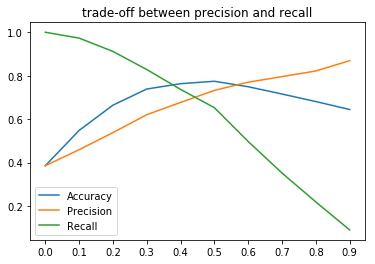

In [176]:
# Plotting the above values to find the optimum value
plt.figure()
plt.plot(threshold_dataframe['Cutoff_prob'], threshold_dataframe['Accuracy'])
plt.plot(threshold_dataframe['Cutoff_prob'], threshold_dataframe['Precision'])
plt.plot(threshold_dataframe['Cutoff_prob'], threshold_dataframe['Recall'])
plt.xticks(prob_list)
plt.title('trade-off between precision and recall')
plt.legend(loc = 0)
plt.show()

- From above curve we can see that the optimum vlaue is obatined between 0.4-0.5 cut off probabilities but results in low recall value. But as per this business requirement we need a ballpark recall close to >= 80%. Hence we will considering cut off probability close to 0.3 which results in good recall value and decent precision and accuracy. In order to have an high recall value as per business requirement it is accpetable to let go off some accuracy.

##### Checking the model performace on the train dataset

In [177]:
# calculating metrics considering 0.3 as threshold porbability value
print('The precision value: {}'.format(threshold_dataframe.iloc[3,2]))
print('The recall value: {}'.format(threshold_dataframe.iloc[3,3]))
print('The accuracy value: {}'.format(threshold_dataframe.iloc[3,1]))

The precision value: 0.6201408019589838
The recall value: 0.8282910874897792
The accuracy value: 0.7384663832467327


- From above values upon considering the threshold probability and computing on the train dataset gives good recall value as required by the business requirement and also decent values for accuracy and precision. Hence considering 0.3 as cut off probability results good results.

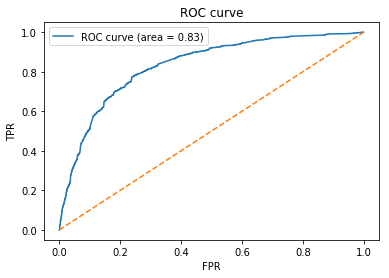

In [178]:
# Plotting ROC curve on the train dataset using the model
fpr,tpr,threshold  = roc_curve(pred_dataframe['Actual_labels'], pred_dataframe['Pred_prob'], drop_intermediate= False)
auc_value = roc_auc_score(pred_dataframe['Actual_labels'], pred_dataframe['Pred_prob'])
plt.figure()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.plot(fpr,tpr,label = 'ROC curve (area = %0.2f)' % auc_value)
plt.plot([0,1],[0,1], '--')
plt.legend(loc = 0)
plt.show()

- From above ROC curve we can see that the area under the curve is close to 1.0 i.e. 0.83 which is an good indication that the  model performance is good on the train dataset. Let's make predictions on the test dataset as well using the threshold probability of 0.3 and also look at its ROC curve.

## Making predictions

#### Considering cut off probability to be 0.3 and making predictions on the test data set

In [179]:
# analyzing the X_test
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Direct Traffic,Google,Olark Chat,Organic Search,...,Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Media and Advertising,Operations Management,Supply Chain Management,Travel and Tourism,Modified_notable
3271,4.0,157,4.0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1490,5.0,1513,5.0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7936,2.0,74,2.0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4216,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3830,8.0,164,8.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [180]:
# Scaling X_test using the scaler object defined for the train dataset
X_test[numerical_columns_list] = scaler.transform(X_test[numerical_columns_list])

C:\Users\saimmidi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [181]:
# modifying X_test 
X_test = X_test[list(X_train.columns)]
# analyzing the X_test
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Direct Traffic,Olark Chat,Organic Search,Email Opened,SMS Sent,Finance Management,Modified_notable
3271,0.200018,-0.600595,0.828532,0,0,0,1,0,1,0
1490,0.508645,1.887326,1.331447,1,0,0,1,0,0,0
7936,-0.417238,-0.752879,-0.177298,0,0,0,1,0,1,0
4216,-1.034493,-0.888650,-1.183128,0,0,0,1,0,0,1
3830,1.434528,-0.587751,2.840192,0,0,1,1,0,0,0


In [182]:
# adding constant to X_test
X_test_sm = sm.add_constant(X_test)
# making predictions using the model
y_test_pred_prob = logreg_model_6.predict(X_test_sm)
# analyzing the predictive probabilities
y_test_pred_prob.head()

3271    0.198492
1490    0.523377
7936    0.279020
4216    0.294099
3830    0.075600
dtype: float64

In [183]:
# creating dataframe including actual labels and pred_prob
pred_dataframe_test = pd.DataFrame()
# adding column for actual labels
pred_dataframe_test['Actual_labels'] = y_test
# adding column for prediction probabilities
pred_dataframe_test['Pred_prob'] = y_test_pred_prob
# resetting the index
pred_dataframe_test = pred_dataframe_test.reset_index()
# renaming the columns
pred_dataframe_test.columns = ['Cust_index','Actual_labels','Pred_prob']
# analyzing the dataframe
pred_dataframe_test.head()

,Cust_index,Actual_labels,Pred_prob
0,3271,0,0.198492
1,1490,1,0.523377
2,7936,0,0.279020
3,4216,1,0.294099
4,3830,0,0.075600


In [184]:
# making predictions of labels using the optimum threshold probability value
pred_dataframe_test['Pred_labels'] = pred_dataframe_test['Pred_prob'].apply(lambda x: 1 if x>= 0.3 else 0)
# analyzing the datframe
pred_dataframe_test.head()

,Cust_index,Actual_labels,Pred_prob,Pred_labels
0,3271,0,0.198492,0
1,1490,1,0.523377,1
2,7936,0,0.279020,0
3,4216,1,0.294099,0
4,3830,0,0.075600,0


##### Checking the model performance on the test dataset

In [185]:
# Building the confusion matrix
matrix_test = confusion_matrix(pred_dataframe_test['Actual_labels'], pred_dataframe_test['Pred_labels'])
# analyzing the matrix
matrix_test

array([[1207,  527],
       [ 194,  795]], dtype=int64)

In [186]:
# determing precision, recall and accuracy
precision_value_test = precision_score(pred_dataframe_test['Actual_labels'], pred_dataframe_test['Pred_labels'])
recall_value_test = recall_score(pred_dataframe_test['Actual_labels'], pred_dataframe_test['Pred_labels'])
accuracy_value_test =  accuracy_score(pred_dataframe_test['Actual_labels'], pred_dataframe_test['Pred_labels'])
print('The accuracy value:{}'.format(accuracy_value_test))
print('The precision value:{}'.format(precision_value_test))
print('The recall value:{}'.format(recall_value_test))

The accuracy value:0.7352185089974294
The precision value:0.6013615733736762
The recall value:0.8038422649140546


- From above metrics values we can see that recall value has ~80% along with decent values of precision and accuracy. Having a recall value of close 80% indicates that the model is able to predict 80% of the converted cases among all actual converted cases which is an indication that model is perdorming well as per business requirement.

In [187]:
# measuring the F1 score associated
f1_score = 2*((precision_value_test*recall_value_test)/(precision_value_test+recall_value_test))
f1_score

0.6880138468195586

- The F1 score determines the overall performance of the model taking into consideration of harmonic mean of precision and recall.

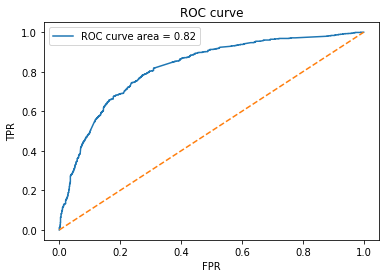

In [188]:
# Plotting ROC curve on the test dataset using the model
fpr,tpr,threshold = roc_curve(pred_dataframe_test['Actual_labels'], pred_dataframe_test['Pred_prob'], drop_intermediate= False)
# checking for the area under the curve
auc_value_test = roc_auc_score(pred_dataframe_test['Actual_labels'], pred_dataframe_test['Pred_prob'])
# plotting the roc curve
plt.figure()
plt.plot(fpr,tpr, label = 'ROC curve area = %0.2f' %auc_value_test)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc = 0)
# plotting the random model roc curve which is nothing but line passing through origin
plt.plot([0,1],[0,1],'--')
plt.show()

- From above ROC curve we can see that area under the curve on the test dataset as well is almost equal to ~1 i.e. 0.82 which is an indication that the model is performing well on the test dataset as well.

##### Generating score variable on the test dataset

In [189]:
# analyzing the pred_dataframe_test
pred_dataframe_test.head()

,Cust_index,Actual_labels,Pred_prob,Pred_labels
0,3271,0,0.198492,0
1,1490,1,0.523377,1
2,7936,0,0.279020,0
3,4216,1,0.294099,0
4,3830,0,0.075600,0


In [190]:
# creating a column for log odds and odds in the dataframe
pred_dataframe_test['Odds'] = pred_dataframe_test['Pred_prob'].apply(lambda x: x/(1-x))
pred_dataframe_test['Logodds'] = pred_dataframe_test['Pred_prob'].apply(lambda x: math.log(x/(1-x)))

In [191]:
# analyzing the dataframe
pred_dataframe_test.head()

,Cust_index,Actual_labels,Pred_prob,Pred_labels,Odds,Logodds
0,3271,0,0.198492,0,0.247649,-1.395744
1,1490,1,0.523377,1,1.098093,0.093575
2,7936,0,0.279020,0,0.387001,-0.949329
3,4216,1,0.294099,0,0.416630,-0.875558
4,3830,0,0.075600,0,0.081782,-2.503693


In [192]:
# adding column to determine Score
pred_dataframe_test['Score'] = pred_dataframe_test['Pred_prob'].apply(lambda x: round(x*100,0))
# analyzing dataframe after addition of column
pred_dataframe_test.head()

,Cust_index,Actual_labels,Pred_prob,Pred_labels,Odds,Logodds,Score
0,3271,0,0.198492,0,0.247649,-1.395744,20.0
1,1490,1,0.523377,1,1.098093,0.093575,52.0
2,7936,0,0.279020,0,0.387001,-0.949329,28.0
3,4216,1,0.294099,0,0.416630,-0.875558,29.0
4,3830,0,0.075600,0,0.081782,-2.503693,8.0


- The column Score indicates the probability of an person getting converted. Range of the score lies in between 0-100. Person having higher score value have higher chances of getting converted into paid customer similarly lower score value indicates that particular person has lower chances of getting converted. Upon knowing the score value we can easily identify the potential customer so that the sales customer can target those potential customer rather than contacting everyone. Doing so it will off load the work force required by the compnay and also saves time in finding out the potential leads.

In [193]:
# resetting the index of pred_dataframe_test
pred_dataframe_test.set_index('Cust_index', inplace = True)
# analyzing the dataframe after resetting the index
pred_dataframe_test.head()

,Actual_labels,Pred_prob,Pred_labels,Odds,Logodds,Score
Cust_index,,,,,,
3271,0,0.198492,0,0.247649,-1.395744,20.0
1490,1,0.523377,1,1.098093,0.093575,52.0
7936,0,0.279020,0,0.387001,-0.949329,28.0
4216,1,0.294099,0,0.416630,-0.875558,29.0
3830,0,0.075600,0,0.081782,-2.503693,8.0


##### Analyzing the variation between Score and features present in Model on X_test

In [194]:
# Modifying the X_test_copy using the features obtained from the model
X_test_copy = X_test_copy[X_train.columns]

In [195]:
# Appending the Score column into X_test
X_test_copy['Score'] = pred_dataframe_test['Score']
# analyzing X_test after addition of column
X_test_copy.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Direct Traffic,Olark Chat,Organic Search,Email Opened,SMS Sent,Finance Management,Modified_notable,Score
3271,4.0,157,4.0,0,0,0,1,0,1,0,20.0
1490,5.0,1513,5.0,1,0,0,1,0,0,0,52.0
7936,2.0,74,2.0,0,0,0,1,0,1,0,28.0
4216,0.0,0,0.0,0,0,0,1,0,0,1,29.0
3830,8.0,164,8.0,0,0,1,1,0,0,0,8.0


In [196]:
# Sorting the dataframe based on Score
X_test_copy.sort_values('Score', ascending = False, inplace = True)
# analyzing the dataframe after sorting
X_test_copy.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Direct Traffic,Olark Chat,Organic Search,Email Opened,SMS Sent,Finance Management,Modified_notable,Score
3758,2.0,1609,2.0,0,0,0,0,1,0,0,97.0
1899,6.0,1830,3.0,0,0,0,0,1,0,0,97.0
4578,4.0,2111,4.0,0,0,0,0,1,1,0,96.0
6760,12.0,1805,3.0,0,0,1,0,1,0,0,96.0
8505,7.0,1721,3.5,0,0,0,0,1,0,0,96.0


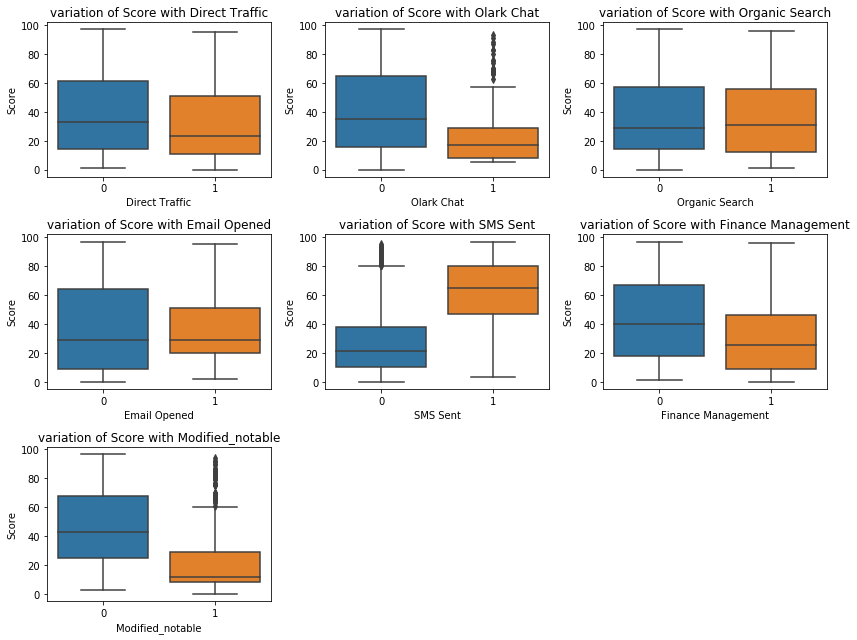

In [197]:
# analyzing the variation in between the categorical features of the model and the score variable
plt.figure(figsize=(12,9))
for index, column_name in enumerate(['Direct Traffic', 'Olark Chat', 'Organic Search', 'Email Opened','SMS Sent', 'Finance Management', 'Modified_notable']):
    plt.subplot(3,3,index+1)
    plt.title('variation of Score with'+' '+ column_name)
    sns.boxplot(X_test_copy[column_name], X_test_copy['Score'])
    plt.tight_layout()
plt.show()

__From the above box plots the following observations can be made:__
- There exists no much variation in scores between customer sourced from Direct talk or not. The median of the customer approached through direct talk is less than the median of the customer who didn't approach through direct talk in realtion with other sources.
- The variation in score for the customer who didn't approach through Olark chat is more than the customer who approached through Olark chat in relation with other lead sources. So it is a indication that most of the customer haven't approached though Olark chat. 
- There exists no much variation in scores between the customer who have approached through Organic Search to the customer who haven't approached though Organic Search. Also median values are almost same.
- The variation in scores is same for the customer who haevn't opened the mail to the cutomers who have opened the mail and their median values are almost same. Though the variation in scores is more between 25th percentile to 75th percentile for the customer who haven't opened the mail to the customers who have opened the mail.
- The variation of the scores in the lower quartile region is more for the customer whose last activity is sent SMS than to the people who haven't sent SMS. Also median value is higher for the customers whose activity is sent SMS and the variation as well.
- Median values for customer not having specilization of Finance Management is more compared to the customers having specialization of Finance Management which is an indication that people who don't belong to Finance management have higher score value when compared to people belonging to Finance Management.
- People whose Last Notable activity is not Modified have higher variation in score when compared to people whose Last Notable activity is Modified.

- In order to compare the relation between Score and the numerical values score buckets can be created and can be considered them as categorical variables which will be simpler in understanding the variation between score and the numerical variables of X_test.

In [198]:
# Creating Score buckets
X_test_copy['Score_bucket'] = pd.cut(X_test_copy['Score'],[0,20,40,60,80,1000], labels= ['0-20','20-40','40-60','60-80','80-100'])

In [199]:
# analyzing the dataframe after creating score buckets
X_test_copy.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Direct Traffic,Olark Chat,Organic Search,Email Opened,SMS Sent,Finance Management,Modified_notable,Score,Score_bucket
3758,2.0,1609,2.0,0,0,0,0,1,0,0,97.0,80-100
1899,6.0,1830,3.0,0,0,0,0,1,0,0,97.0,80-100
4578,4.0,2111,4.0,0,0,0,0,1,1,0,96.0,80-100
6760,12.0,1805,3.0,0,0,1,0,1,0,0,96.0,80-100
8505,7.0,1721,3.5,0,0,0,0,1,0,0,96.0,80-100


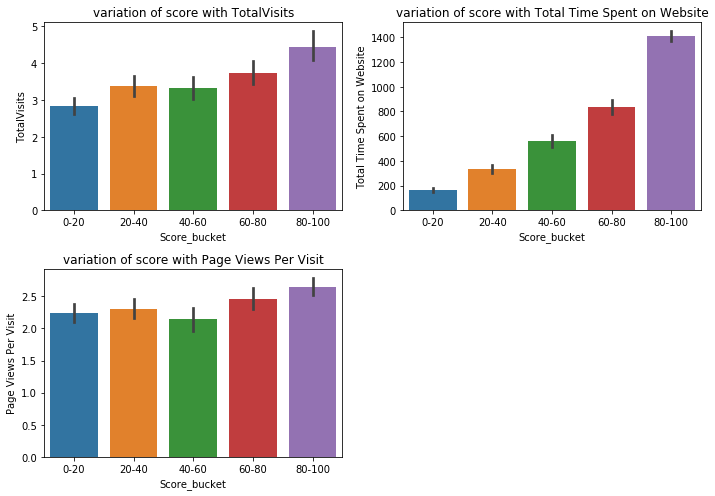

In [200]:
# analyzing the variation between score and the numerical columns of X_test
plt.figure(figsize=(10,7))
for index, column_name in enumerate(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']):
    plt.subplot(2,2,index+1)
    sns.barplot('Score_bucket', column_name, data= X_test_copy, estimator= np.mean)
    plt.title('variation of score with'+' '+column_name)
    plt.tight_layout()
plt.show()

__From the above plots the following observations can be made:__
- Leads having Total visits greater than 4 have higher chances of getting converted. 
- Similarly leads spending time around 1200 mins + have higher chance of conversion. 
- Leads viewing pages around 2+ have higher chances of conversion